In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Input, Dense, Flatten, Reshape
from keras.callbacks import ModelCheckpoint
from keras.utils import plot_model

%matplotlib inline

# Loading the dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalizing the values
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print(x_train.shape)
print(x_test.shape)


4422102/4422102 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 128)               8320

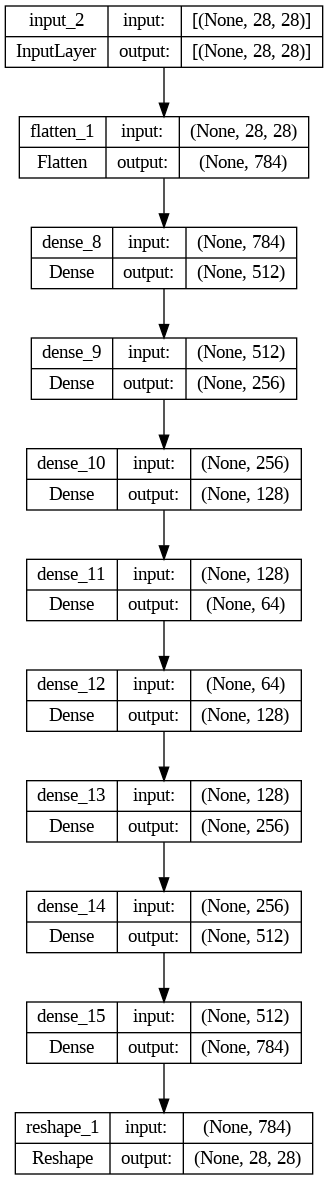

In [6]:
# Architecture parameters
input_shape = (28,28)
latent_dim = 64

# Encoder
inputs = Input(shape=input_shape)
x = Flatten()(inputs)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(latent_dim, activation='relu')(x)

# Decoder
x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(np.prod(input_shape), activation='sigmoid')(x)
decoded = Reshape(input_shape)(x)

# Autoencoder = Encoder + Decoder
autoencoder1 = Model(inputs, decoded)
encoder1 = Model(inputs, encoded)

# Compile the model
autoencoder1.compile(optimizer=Adam(), loss='binary_crossentropy' , metrics='accuracy')

# Display model architecture
autoencoder1.summary()
plot_model(autoencoder1, show_shapes=True)



In [4]:
# Training parameters
batch_size = 128
epochs = 50

# Create a callback to save the model
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history1 = autoencoder1.fit(x_train, x_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          validation_data=(x_test, x_test),
                          callbacks=[checkpoint])


Epoch 1/50
469/469 [==============================] - 8s 8ms/step - loss: 0.3339 - accuracy: 0.0861 - val_loss: 0.3020 - val_accuracy: 0.1088
Epoch 2/50
469/469 [==============================] - 3s 5ms/step - loss: 0.2944 - accuracy: 0.1254 - val_loss: 0.2916 - val_accuracy: 0.1289
Epoch 3/50
469/469 [==============================] - 3s 5ms/step - loss: 0.2872 - accuracy: 0.1488 - val_loss: 0.2879 - val_accuracy: 0.1574
Epoch 4/50
469/469 [==============================] - 3s 5ms/step - loss: 0.2829 - accuracy: 0.1644 - val_loss: 0.2834 - val_accuracy: 0.1672
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 0.2798 - accuracy: 0.1774 - val_loss: 0.2812 - val_accuracy: 0.1768
Epoch 6/50
469/469 [==============================] - 3s 7ms/step - loss: 0.2776 - accuracy: 0.1877 - val_loss: 0.2788 - val_accuracy: 0.1993
Epoch 7/50
469/469 [==============================] - 3s 5ms/step - loss: 0.2759 - accuracy: 0.1958 - val_loss: 0.2775 - val_accuracy: 0.1960
Epoch 

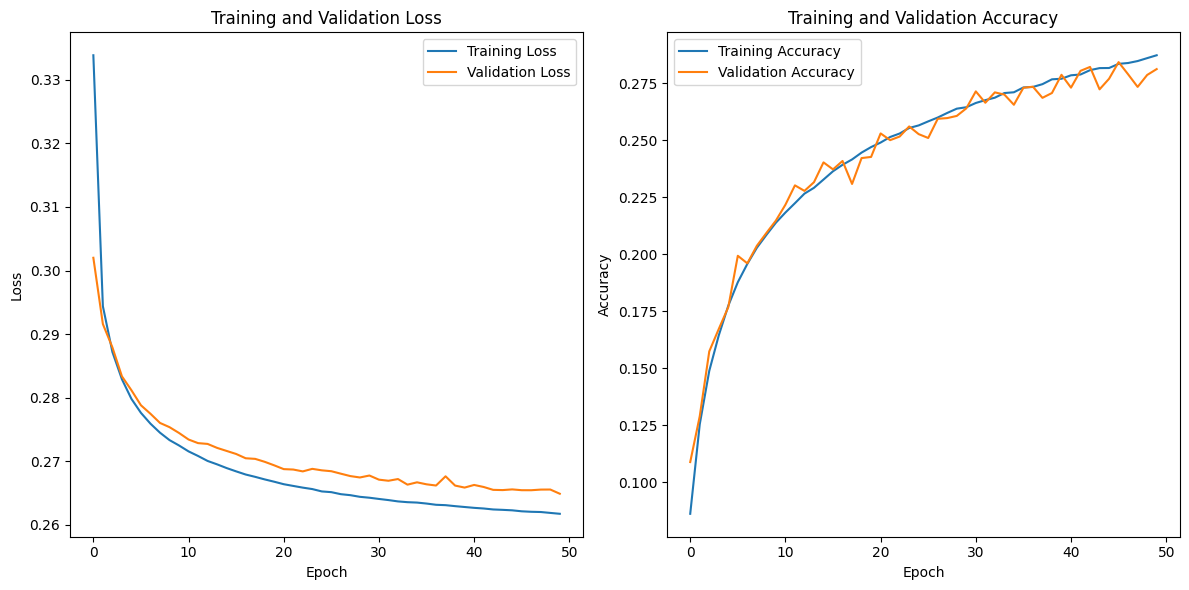

In [5]:

# Plotting the loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy
plt.subplot(1, 2, 2)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 256)               131328    
                                                           

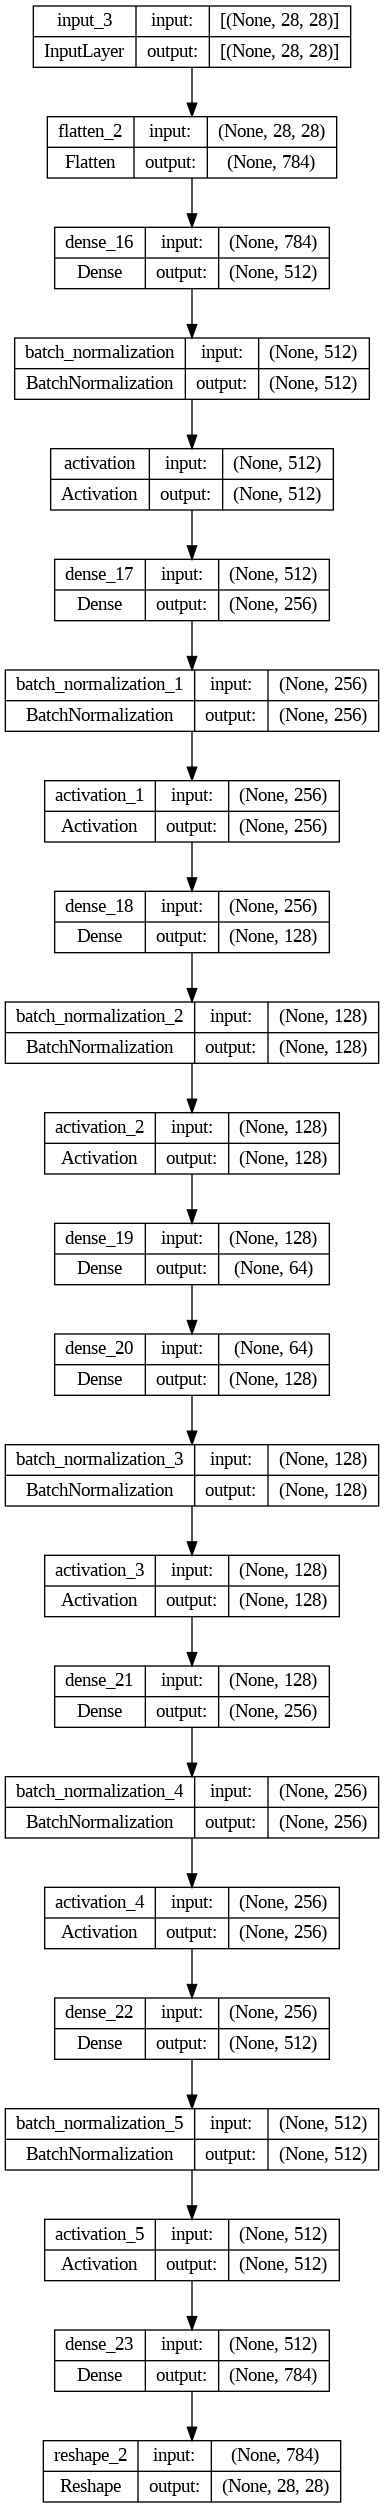

In [7]:
from keras.layers import BatchNormalization, Activation
from keras.regularizers import l2

# Encoder
inputs = Input(shape=input_shape)
x = Flatten()(inputs)
x = Dense(512, kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(256, kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(128, kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
encoded = Dense(latent_dim)(x)

# Decoder
x = Dense(128, kernel_regularizer=l2(0.001))(encoded)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(256, kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(512, kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(np.prod(input_shape), activation='sigmoid')(x)
decoded = Reshape(input_shape)(x)

# Autoencoder = Encoder + Decoder
autoencoder2 = Model(inputs, decoded)
encoder2 = Model(inputs, encoded)


# Compile the model
autoencoder2.compile(optimizer=Adam(), loss='mean_squared_error' , metrics='accuracy')

# Display model architecture
autoencoder2.summary()

plot_model(autoencoder2, show_shapes=True)


In [8]:
# Training parameters
batch_size = 128
epochs = 50

# Create a callback to save the model
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history2 = autoencoder2.fit(x_train, x_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          validation_data=(x_test, x_test),
                          callbacks=[checkpoint])
encoded_imgs=encoder2.predict(x_test)
predicted=autoencoder2.predict(x_test)



Epoch 1/50
469/469 [==============================] - 7s 11ms/step - loss: 0.1374 - accuracy: 0.0973 - val_loss: 0.0586 - val_accuracy: 0.0680
Epoch 2/50
469/469 [==============================] - 6s 12ms/step - loss: 0.0293 - accuracy: 0.1109 - val_loss: 0.0421 - val_accuracy: 0.1151
Epoch 3/50
469/469 [==============================] - 4s 10ms/step - loss: 0.0282 - accuracy: 0.1173 - val_loss: 0.0405 - val_accuracy: 0.1008
Epoch 4/50
469/469 [==============================] - 5s 10ms/step - loss: 0.0274 - accuracy: 0.1208 - val_loss: 0.0395 - val_accuracy: 0.0994
Epoch 5/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0264 - accuracy: 0.1241 - val_loss: 0.0402 - val_accuracy: 0.1133
Epoch 6/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0253 - accuracy: 0.1286 - val_loss: 0.0329 - val_accuracy: 0.1313
Epoch 7/50
469/469 [==============================] - 5s 10ms/step - loss: 0.0242 - accuracy: 0.1311 - val_loss: 0.0367 - val_accuracy: 0.1017


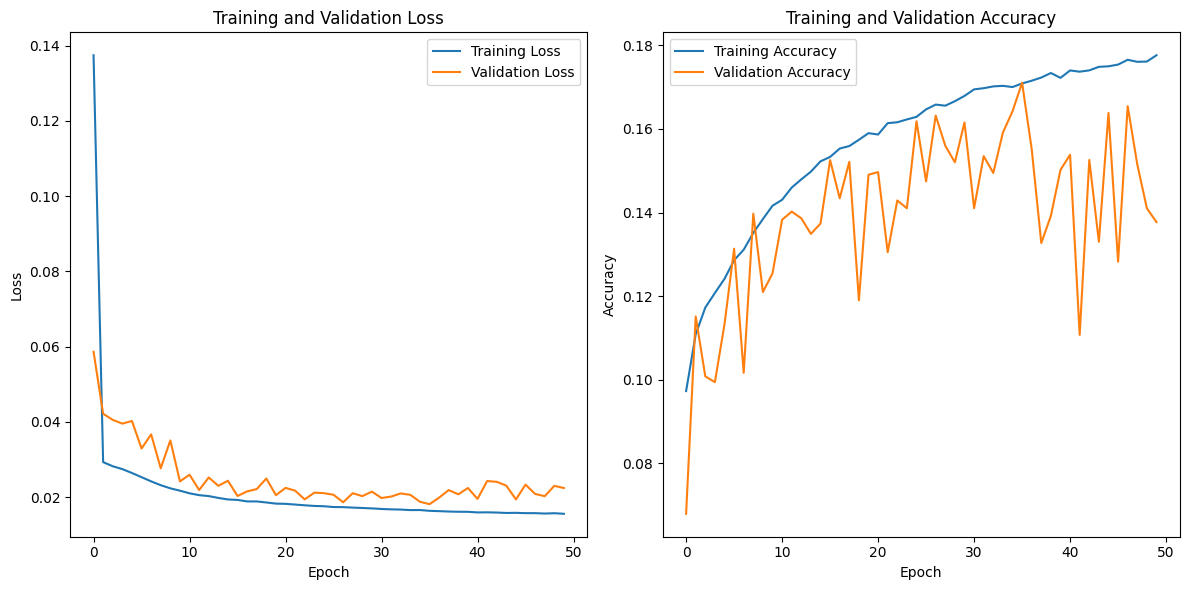

In [9]:

# Plotting the loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy
plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [10]:
# Loading the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

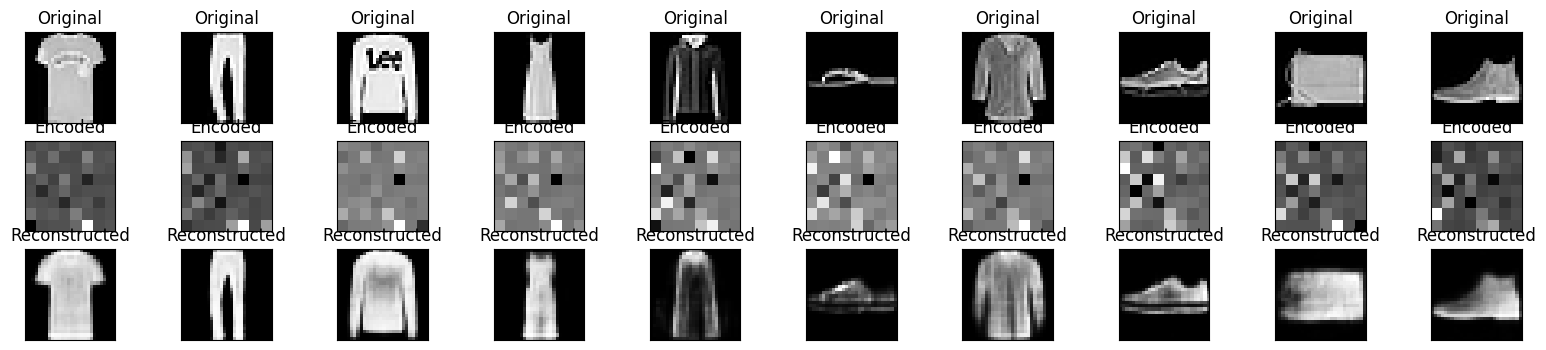

In [11]:
indices = []
for i in range(10):
    idx = np.where(y_test == i)[0][0]
    indices.append(idx)

# Plot original, encoded, and decoded images for each category
n = 10  # Number of categories we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # Get the index for the current category
    idx = indices[i]


    #
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test[idx].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title(f'Original')

    #
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[idx].reshape(8,8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title(f'Encoded')


    ax = plt.subplot(3, 20, 2*20+ i + 1 )
    plt.imshow(predicted[idx].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title(f'Reconstructed')
plt.show()

In [22]:
def add_noise(images, noise_factor=0.2):
    images_noisy = images + noise_factor * np.random.normal(loc=0.0, scale=.1, size=images.shape)
    images_noisy = np.clip(images_noisy, 0., 1.)
    return images_noisy



In [29]:
(X_train, _), (X_test, _) = fashion_mnist.load_data()

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [30]:
X_train = X_train.reshape(len(X_train), 784)
X_test = X_test.reshape(len(X_test), 784)

X_train_noisy = X_train_noisy.reshape(len(X_train_noisy), 784)
X_test_noisy = X_test_noisy.reshape(len(X_test_noisy), 784)

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [31]:
input_img = Input(shape=(784,))
encoder = Dense(units=32, activation='relu')(input_img)
decoder = Dense(units=784, activation='sigmoid')(encoder)

autoencoder = Model(input_img, decoder)
autoencoder.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_24 (Dense)            (None, 32)                25120     
                                                                 
 dense_25 (Dense)            (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [42]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train_noisy, X_train,
                epochs=30,
                validation_data=(X_test_noisy, X_test),
                batch_size=256)

Epoch 1/30
235/235 [==============================] - 2s 5ms/step - loss: 0.0188 - val_loss: 0.0192
Epoch 2/30
235/235 [==============================] - 1s 6ms/step - loss: 0.0187 - val_loss: 0.0191
Epoch 3/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0187 - val_loss: 0.0191
Epoch 4/30
235/235 [==============================] - 1s 6ms/step - loss: 0.0187 - val_loss: 0.0191
Epoch 5/30
235/235 [==============================] - 1s 6ms/step - loss: 0.0187 - val_loss: 0.0191
Epoch 6/30
235/235 [==============================] - 1s 6ms/step - loss: 0.0187 - val_loss: 0.0191
Epoch 7/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0187 - val_loss: 0.0191
Epoch 8/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0187 - val_loss: 0.0191
Epoch 9/30
235/235 [==============================] - 1s 4ms/step - loss: 0.0186 - val_loss: 0.0190
Epoch 10/30
235/235 [==============================] - 1s 4ms/step - loss: 0.0186 - val_loss: 0.0190

In [43]:
encoder_model = Model(input_img, encoder)
encoder_model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_24 (Dense)            (None, 32)                25120     
                                                                 
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [47]:
decoded_imgs = autoencoder.predict(X_test_noisy)
encoded_images = encoder_model.predict(X_test_noisy)

313/313 [==============================] - 0s 1ms/step


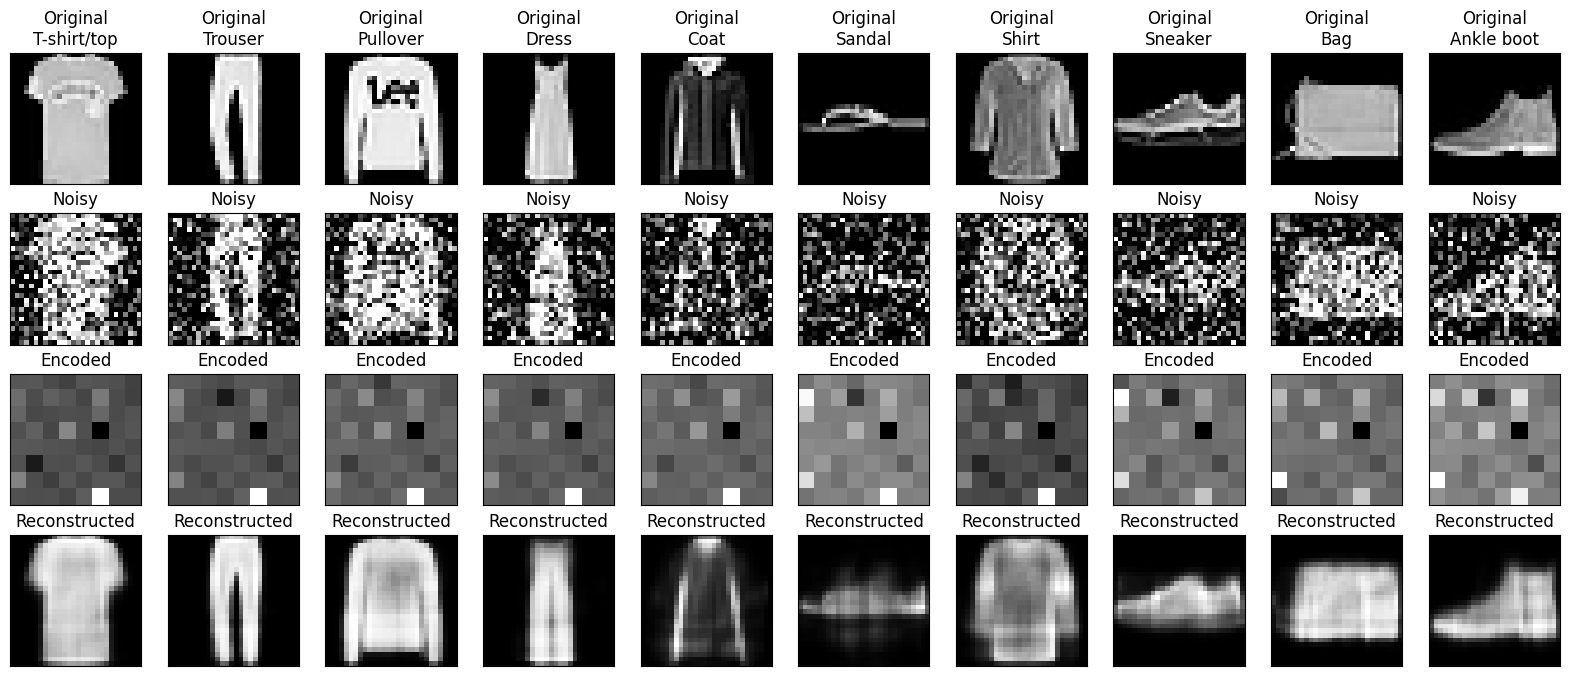

In [48]:

# Define label names
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot original, noisy, encoded, and decoded images for each category
n = 10  
plt.figure(figsize=(20, 8))
for i in range(n):
    # Get the index for the current category
    idx = indices[i]

    # Display original
    ax = plt.subplot(4, n, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title('Original\n' + label_names[y_test[idx]])

    # Display noisy
    ax = plt.subplot(4, n, i + 1 + n)
    plt.imshow(X_test_noisy[idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title('Noisy')

    # Display encoding
    ax = plt.subplot(4, n, i + 1 + 2 * n)
    plt.imshow(encoded_imgs[idx].reshape(8, 8)) 
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title('Encoded')

    # Display reconstruction
    ax = plt.subplot(4, n, i + 1 + 3 * n)
    plt.imshow(decoded_imgs[idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title('Reconstructed')
plt.show()


In [ ]:
from tensorflow.keras.layers import Lambda
from tensorflow.keras import backend as K


def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

# Encoder
inputs = Input(shape=input_shape)
x = Flatten()(inputs)
x = Dense(512)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(256)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
z_mean = Dense(latent_dim)(x)
z_log_var = Dense(latent_dim)(x)

z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Instantiate the encoder model
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()

# Decoder
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(256)(latent_inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(512)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(np.prod(input_shape), activation='sigmoid')(x)
outputs = Reshape(input_shape)(x)

# instantiate decoder model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae')

# Add KL divergence regularization loss
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae.add_loss(K.mean(kl_loss) / np.prod(input_shape))

# Compile the model
vae.compile(optimizer=Adam(), loss='mean_squared_error')
vae.summary()

# Fit the model to the data
vae.fit(x_train, x_train, epochs=50, batch_size=128, validation_data=(x_test, x_test))


Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 flatten_5 (Flatten)            (None, 784)          0           ['input_6[0][0]']                
                                                                                                  
 dense_32 (Dense)               (None, 512)          401920      ['flatten_5[0][0]']              
                                                                                                  
 batch_normalization_10 (BatchN  (None, 512)         2048        ['dense_32[0][0]']               
 ormalization)                                                                              

1/1 [==============================] - 0s 24ms/step


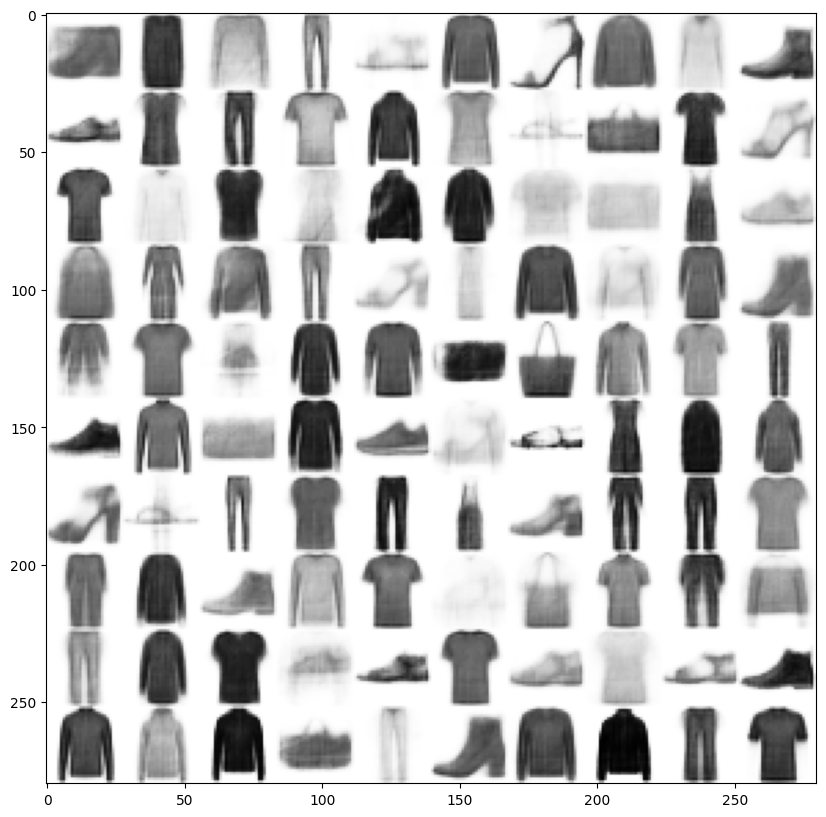

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

n = 10  # the number of images to generate
img_rows, img_cols = 28, 28  
latent_dim = 64  


figure = np.zeros((img_rows * n, img_cols * n))


for i in range(n):
    for j in range(n):
        z_sample = np.random.normal(size=(1, latent_dim))
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(img_rows, img_cols)
        figure[i * img_rows: (i + 1) * img_rows,
               j * img_cols: (j + 1) * img_cols] = digit

plt.figure(figsize=(10, 10))

# Normalize color map for better contrast
norm = Normalize(vmin=figure.min(), vmax=figure.max())
plt.imshow(figure, cmap='Greys', norm=norm)

plt.show()


In [ ]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

# Build classifier model
classifier = Sequential()
classifier.add(Dense(512, activation='relu', input_shape=(latent_dim,)))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.5))
classifier.add(Dense(256, activation='relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.5))
classifier.add(Dense(128, activation='relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.5))
classifier.add(Dense(10, activation='softmax'))  # output layer for 10 classes

########



y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)




# Compile the model
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Use the encoder to transform the input data into its latent representation
x_train_encoded = encoder.predict(x_train)[0]  # Use the mean (index 0) as the latent representation
x_test_encoded = encoder.predict(x_test)[0]

# Fit the model with the updated target values
history = classifier.fit(x_train_encoded, y_train_encoded, epochs=50, batch_size=128,
               validation_data=(x_test_encoded, y_test_encoded))


313/313 [==============================] - 1s 4ms/step
Epoch 1/50
469/469 [==============================] - 10s 17ms/step - loss: 0.8644 - accuracy: 0.6900 - val_loss: 0.5480 - val_accuracy: 0.7952
Epoch 2/50
469/469 [==============================] - 8s 17ms/step - loss: 0.6330 - accuracy: 0.7639 - val_loss: 0.5214 - val_accuracy: 0.8056
Epoch 3/50
469/469 [==============================] - 8s 18ms/step - loss: 0.5842 - accuracy: 0.7837 - val_loss: 0.4996 - val_accuracy: 0.8113
Epoch 4/50
469/469 [==============================] - 7s 15ms/step - loss: 0.5588 - accuracy: 0.7950 - val_loss: 0.4960 - val_accuracy: 0.8145
Epoch 5/50
469/469 [==============================] - 9s 18ms/step - loss: 0.5440 - accuracy: 0.7983 - val_loss: 0.4977 - val_accuracy: 0.8128
Epoch 6/50
469/469 [==============================] - 7s 14ms/step - loss: 0.5290 - accuracy: 0.8063 - val_loss: 0.4718 - val_accuracy: 0.8208
Epoch 7/50
469/469 [==============================] - 8s 18ms/step - loss: 0.5169 - ac

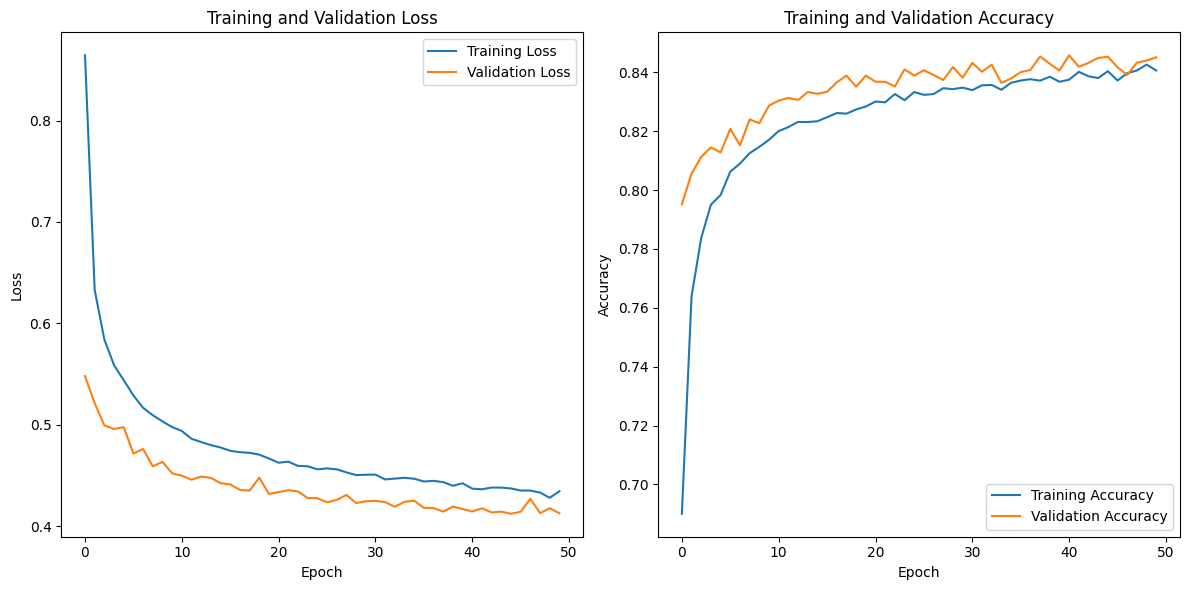

In [ ]:

# Plotting the loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
